### Team: Valiant Vaccinators
### The Correlation Between COVID-19 Vaccinations and Death Rates

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [23]:
covid_data = pd.read_csv(r"./NCCovidDeaths.csv")
covid_data.head()

,Date,Antigen Positive Cases by Specimen Date,Deaths by Date of Death,Cases by Report Date,Molecular (PCR) Positive Cases by Specimen Date
0,3/24/2020,1,1.0,101,175
1,3/25/2020,0,1.0,106,198
2,3/26/2020,0,1.0,132,197
3,3/27/2020,0,1.0,128,167
4,3/28/2020,1,1.0,171,99


In [24]:
covid_data_drop = covid_data.drop(["Date"], axis = 1)
covid_data_drop.head()

,Antigen Positive Cases by Specimen Date,Deaths by Date of Death,Cases by Report Date,Molecular (PCR) Positive Cases by Specimen Date
0,1,1.0,101,175
1,0,1.0,106,198
2,0,1.0,132,197
3,0,1.0,128,167
4,1,1.0,171,99


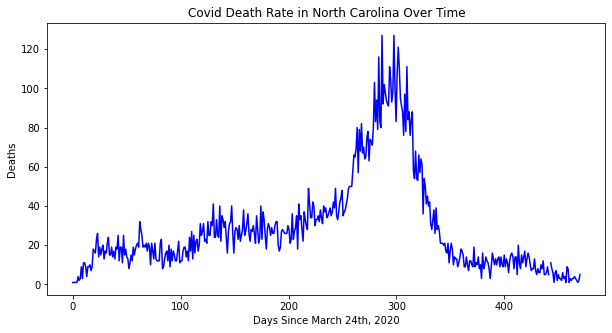

In [31]:
plt.xlabel('Days Since March 24th, 2020')
plt.ylabel('Deaths')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Death Rate in North Carolina Over Time')
x_vals = np.linspace(0, 470, 470)
plt.plot(x_vals, covid_data["Deaths by Date of Death"], 'b')

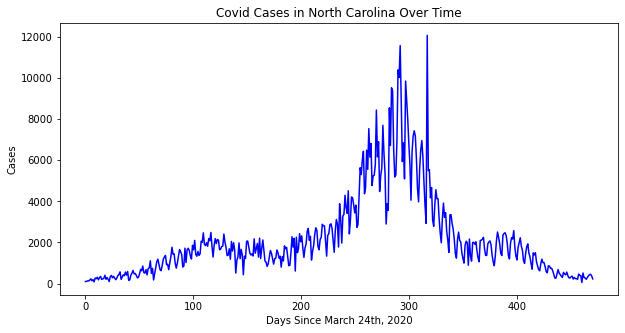

In [46]:
plt.xlabel('Days Since March 24th, 2020')
plt.ylabel('Cases')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Cases in North Carolina Over Time')
x_vals = np.linspace(0, 470, 470)
plt.plot(x_vals, covid_data["Cases by Report Date"], 'b')

In [12]:
covid_county_deaths = pd.read_csv(r"./NCCountyDeaths.csv")
covid_county_deaths.head()

,County,Date Range,Cases,"Cases Per 10,000 Residents","Cases Per 100,000 Residents",Deaths
0,Mecklenburg,Today,115088,1036,10365,980
1,Brunswick,Today,9402,658,6583,156
2,Caldwell,Today,9534,1160,11602,111
3,Rowan,Today,17327,1219,12195,313
4,Burke,Today,10161,1123,11229,164


In [27]:
covid_county_vac = pd.read_csv(r"./NCCovidVac.csv")
covid_county_vac.head()

,County,Measure Names,Measure Values
0,Yancey,Total Po...,18069
1,Yadkin,Total Po...,37667
2,Wilson,Total Po...,81801
3,Wilkes,Total Po...,68412
4,Wayne,Total Po...,123131


In [31]:
covid_county_vac = covid_county_vac.loc[covid_county_vac["Measure Names"] != "Total                                       Population"]
covid_county_vac = covid_county_vac.loc[covid_county_vac["Measure Names"] != "People Vaccinated with at Least One Doses Federal Pharmacy Programs"]
covid_county_vac = covid_county_vac.loc[covid_county_vac["Measure Names"] != "People Vaccinated with at Least One Doses NC Providers"]
covid_county_vac.shape

(204, 3)

In [34]:
covid_vac = covid_county_vac.loc[covid_county_vac["Measure Names"] != "People Fully Vaccinated                   NC Providers"]
covid_vac_nc = covid_county_vac.loc[covid_county_vac["Measure Names"] != "People Fully Vaccinated                         Federal Pharmacy Programs"]

In [35]:
covid_vac.head()

,County,Measure Names,Measure Values
102,Yancey,People Fully Vaccinated ...,532
103,Yadkin,People Fully Vaccinated ...,2298
104,Wilson,People Fully Vaccinated ...,6308
105,Wilkes,People Fully Vaccinated ...,4946
106,Wayne,People Fully Vaccinated ...,8507


In [36]:
covid_vac_nc.head()

,County,Measure Names,Measure Values
306,Yancey,People Fully Vaccinated NC P...,6409
307,Yadkin,People Fully Vaccinated NC P...,11161
308,Wilson,People Fully Vaccinated NC P...,23943
309,Wilkes,People Fully Vaccinated NC P...,17159
310,Wayne,People Fully Vaccinated NC P...,29561


<BarContainer object of 102 artists>

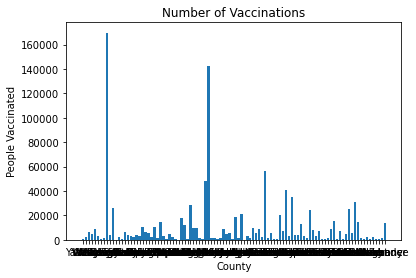

In [38]:
plt.xlabel('County')
plt.ylabel('People Vaccinated')
plt.title('Number of Vaccinations')
plt.bar(covid_vac["County"], covid_vac["Measure Values"])

<BarContainer object of 102 artists>

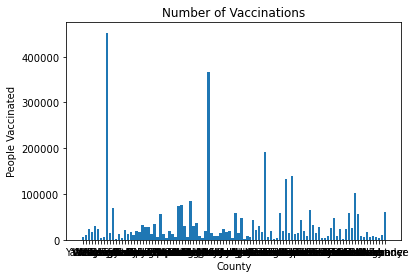

In [41]:
plt.xlabel('County')
plt.ylabel('People Vaccinated')
plt.title('Number of Vaccinations')
plt.bar(covid_vac_nc["County"], covid_vac_nc["Measure Values"])

In [42]:
s1 = covid_vac.set_index('County')['Measure Values']
s2 = covid_vac_nc.set_index('County')['Measure Values']

In [43]:
covid_vac = (s1+s2).reset_index(name = 'Total Vaccinated')

In [44]:
covid_vac.head()

,County,Total Vaccinated
0,Yancey,6941
1,Yadkin,13459
2,Wilson,30251
3,Wilkes,22105
4,Wayne,38068


In [45]:
covid_county_deaths = pd.read_csv(r"./NCCountyDeaths.csv")
covid_county_deaths.head()

,County,Date Range,Cases,"Cases Per 10,000 Residents","Cases Per 100,000 Residents",Deaths
0,Mecklenburg,Today,115088,1036,10365,980
1,Brunswick,Today,9402,658,6583,156
2,Caldwell,Today,9534,1160,11602,111
3,Rowan,Today,17327,1219,12195,313
4,Burke,Today,10161,1123,11229,164


In [46]:
covid_county_deaths = covid_county_deaths.sort_values('County', ascending=False)
covid_county_deaths.head()

,County,Date Range,Cases,"Cases Per 10,000 Residents","Cases Per 100,000 Residents",Deaths
78,Yancey,Today,1638,907,9065,28
94,Yadkin,Today,4142,1100,10996,55
69,Wilson,Today,9974,1219,12193,181
24,Wilkes,Today,6961,1018,10175,117
9,Wayne,Today,11559,939,9388,244


In [47]:
covid_nc = covid_county_deaths.join(covid_vac["Total Vaccinated"])
covid_nc.head()

,County,Date Range,Cases,"Cases Per 10,000 Residents","Cases Per 100,000 Residents",Deaths,Total Vaccinated
78,Yancey,Today,1638,907,9065,28,17300
94,Yadkin,Today,4142,1100,10996,55,7510
69,Wilson,Today,9974,1219,12193,181,17607
24,Wilkes,Today,6961,1018,10175,117,44915
9,Wayne,Today,11559,939,9388,244,18058


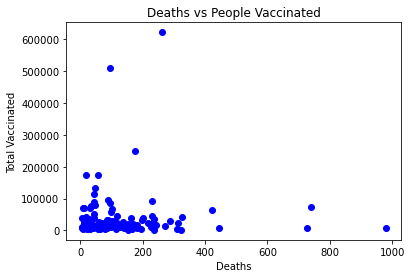

In [49]:
plt.xlabel('Deaths')
plt.ylabel('Total Vaccinated')
plt.title('Deaths vs People Vaccinated')
plt.scatter(covid_nc["Deaths"], covid_nc["Total Vaccinated"], c = "b")

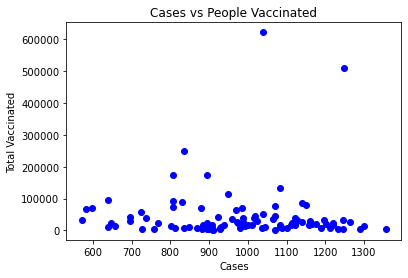

In [51]:
plt.xlabel('Cases')
plt.ylabel('Total Vaccinated')
plt.title('Cases vs People Vaccinated')
plt.scatter(covid_nc["Cases Per 10,000 Residents"], covid_nc["Total Vaccinated"], c = "b")

In [52]:
print(covid_nc["Deaths"].corr(covid_nc["Total Vaccinated"]))

0.00786776928864091


In [96]:
covid_complete_data = pd.read_csv("./NCCovidTrain.csv")
covid_training_processed = covid_complete_data[['Deaths by Date of Death']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

covid_training_scaled = scaler.fit_transform(covid_training_processed)

len(covid_training_scaled)

450

In [97]:
covid_training_features = []
covid_training_labels = []
for i in range(60, len(covid_training_scaled)):
    covid_training_features.append(covid_training_scaled[i-60:i, 0])
    covid_training_labels.append(covid_training_scaled[i, 0])
    
X_train = np.array(covid_training_features)
y_train = np.array(covid_training_labels)
print(X_train.shape)
print(y_train.shape)

(390, 60)
(390,)


In [98]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [99]:
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model

In [100]:
input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation = 'relu', return_sequences = True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation = 'relu', return_sequences = True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation = 'relu', return_sequences = True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation = 'relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer = 'adam', loss = 'mse')

In [101]:
print(X_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(390, 60, 1)
(390,)
(390, 1)


In [102]:
model_history = model.fit(X_train, y_train, epochs = 10, verbose = 1, batch_size = 32)

Epoch 1/10
13/13 [==============================] - 10s 67ms/step - loss: nan
Epoch 2/10
13/13 [==============================] - 1s 67ms/step - loss: nan
Epoch 3/10
13/13 [==============================] - 1s 63ms/step - loss: nan
Epoch 4/10
13/13 [==============================] - 1s 90ms/step - loss: nan
Epoch 5/10
13/13 [==============================] - 1s 57ms/step - loss: nan
Epoch 6/10
13/13 [==============================] - 1s 64ms/step - loss: nan
Epoch 7/10
13/13 [==============================] - 1s 61ms/step - loss: nan
Epoch 8/10
13/13 [==============================] - 1s 66ms/step - loss: nan
Epoch 9/10
13/13 [==============================] - 1s 64ms/step - loss: nan
Epoch 10/10
13/13 [==============================] - 1s 60ms/step - loss: nan


In [93]:
covid_testing_complete_data = pd.read_csv("./NCCovidTest.csv")
covid_testing_processed = covid_testing_complete_data[['Deaths by Date of Death']].values

covid_all_data = pd.concat((covid_complete_data['Deaths by Date of Death'], covid_testing_complete_data['Deaths by Date of Death']), axis = 0)

test_inputs = covid_all_data[len(covid_all_data) - len(covid_testing_complete_data) - 60:].values
print(test_inputs.shape)

test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

covid_test_features = []
for i in range(60, 80):
    covid_test_features.append(test_inputs[i-60:i, 0])

X_test = np.array(covid_test_features)
print(X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
print(y_pred.shape)

(80,)
(80, 1)
(20, 60)
(20, 60, 1)
(20, 1)


In [95]:
covid_all_data.head()
print(y_pred)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


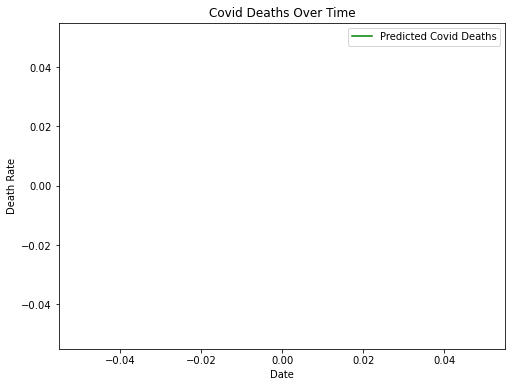

In [83]:
plt.figure(figsize=(8,6))
#plt.plot(covid_testing_processed, color='red', label = 'Actual Covid Deaths')
plt.plot(y_pred, color = 'green', label = 'Predicted Covid Deaths')
plt.title('Covid Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.show()